In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahibmmmdzad","key":"afffe48fb80ff34739f67766fd13e48a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download sujaykapadnis/emotion-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
import zipfile
with zipfile.ZipFile('/content/emotion-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
import shutil
shutil.rmtree('/content/dataset/dataset/Ahegao')

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('/content/dataset'):
    print(f"There are {len(dirnames)} directiories and {len(filenames)} images in '{dirpath}'.")

There are 1 directiories and 1 images in '/content/dataset'.
There are 5 directiories and 0 images in '/content/dataset/dataset'.
There are 0 directiories and 3934 images in '/content/dataset/dataset/Sad'.
There are 0 directiories and 3740 images in '/content/dataset/dataset/Happy'.
There are 0 directiories and 1234 images in '/content/dataset/dataset/Surprise'.
There are 0 directiories and 1313 images in '/content/dataset/dataset/Angry'.
There are 0 directiories and 4027 images in '/content/dataset/dataset/Neutral'.


In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)

# Assuming your images are stored in subdirectories within 'dataset/Sign-language-digits-dataset'
train_dir="/content/dataset/dataset"  # Changed to directory path
test_dir="/content/dataset/dataset" # Changed to directory path

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               label_mode="categorical",
                                                               shuffle=True,
                                                               batch_size=32,
                                                               image_size=IMG_SIZE,
                                                               validation_split=0.2, # Added validation split
                                                               subset='training', # Specifying training subset
                                                               seed=123) # Added seed for reproducibility


test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE,
                                                               validation_split=0.2, # Added validation split
                                                               subset='validation', # Specifying validation subset
                                                               seed=123) # Added seed for reproducibility

Found 14248 files belonging to 5 classes.
Using 11399 files for training.
Found 14248 files belonging to 5 classes.
Using 2849 files for validation.


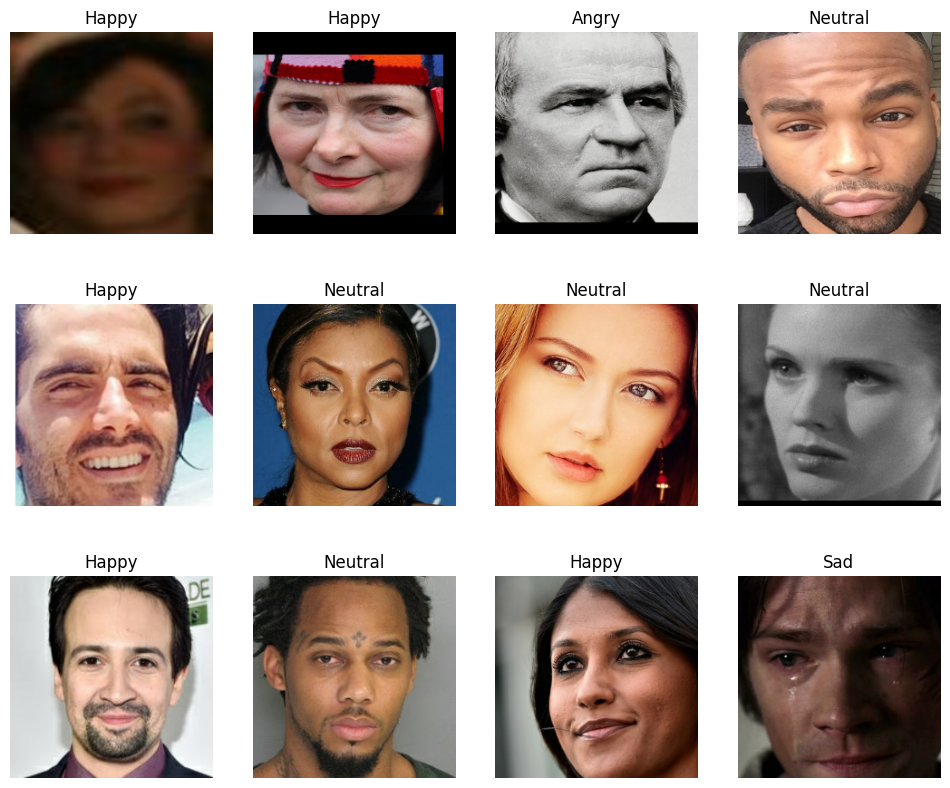

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class_names = train_data.class_names
plt.figure(figsize=(12,10))

for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[np.argmax(labels[i].numpy())])
        plt.axis('off')

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[224, 224, 3]),
    tf.keras.layers.Rescaling(1 / 255),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, strides=2, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=7, strides=2, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=7, strides=2, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=7, strides=2, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=7, strides=2, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

In [ ]:
model.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 146ms/step - accuracy: 0.2655 - loss: 1.8184 - val_accuracy: 0.2741 - val_loss: 1.4738
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.2857 - loss: 1.4855 - val_accuracy: 0.3117 - val_loss: 1.4657
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.2903 - loss: 1.4745 - val_accuracy: 0.3057 - val_loss: 1.4467
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 80s 125ms/step - accuracy: 0.2921 - loss: 1.4624 - val_accuracy: 0.3278 - val_loss: 1.3949
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 46s 130ms/step - accuracy: 0.3330 - loss: 1.4120 - val_accuracy: 0.4405 - val_loss: 1.2490


In [ ]:
input_layer=tf.keras.layers.Input(shape=[224, 224, 3])
x=tf.keras.applications.resnet50.preprocess_input(input_layer)
base_model=tf.keras.applications.ResNet50(include_top=False,input_tensor=x)
avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(len(class_names),activation='softmax')(avg)
model=tf.keras.Model(inputs=input_layer,outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
base_model.trainable=False

In [ ]:
# initial_learning_rate=0.01
# lr_scheduler=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=300,decay_rate=0.95,staircase=True)
# early_stopping=tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True,monitor='val_loss')
# checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('emotion_detector.keras',save_best_only=True,monitor='val_loss')
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
# model.compile(loss='CategoricalCrossentropy',
#               optimizer=tf.keras.optimizers.Adam(learning_rate=lr_scheduler),
#               metrics=['accuracy','f1_score'])
# model.fit(train_data,epochs=12,validation_data=test_data,callbacks=[early_stopping,checkpoint_cb,reduce_lr])

In [ ]:
initial_learning_rate = 0.01
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.95, staircase=True
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=4, restore_best_weights=True, monitor="val_loss"
)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "emotion_detector.keras", save_best_only=True, monitor="val_loss"
)

model.compile(
    loss="CategoricalCrossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
    metrics=["accuracy", "f1_score"]
)
model.fit(
    train_data,
    epochs=12,
    validation_data=test_data,
    callbacks=[early_stopping, checkpoint_cb],
)

Epoch 1/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 80s 187ms/step - accuracy: 0.4712 - f1_score: 0.4359 - loss: 1.9631 - val_accuracy: 0.4791 - val_f1_score: 0.4587 - val_loss: 1.9158
Epoch 2/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 49s 137ms/step - accuracy: 0.5886 - f1_score: 0.5708 - loss: 1.4507 - val_accuracy: 0.5458 - val_f1_score: 0.5200 - val_loss: 1.7099
Epoch 3/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.6439 - f1_score: 0.6288 - loss: 1.1503 - val_accuracy: 0.5816 - val_f1_score: 0.4858 - val_loss: 1.7500
Epoch 4/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.6463 - f1_score: 0.6350 - loss: 1.2131 - val_accuracy: 0.5458 - val_f1_score: 0.4979 - val_loss: 1.8553
Epoch 5/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.6649 - f1_score: 0.6532 - loss: 1.1159 - val_accuracy: 0.5700 - val_f1_score: 0.5361 - val_loss: 1.8184
Epoch 6/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.6544 - f1_score: 0.6439 - loss: 1.3273 - val_accuracy: 0.5777 - va

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def pred_and_plot(model,image_path,true_class):
  plt.figure(figsize=(10,8))
  image=mpimg.imread(image_path)
  image=tf.image.resize(image,size=[224,224])
  pred_probs=model.predict(np.expand_dims(image,axis=0))
  pred=class_names[np.argmax([pred_probs])]
  plt.subplot(1,2,1)
  plt.imshow(image/255.)
  color='g' if pred==true_class else 'r'
  plt.title(pred,color=color)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.bar(class_names,pred_probs[0])
  plt.title('Prediction Probabilities')
  plt.axis('off')
# pred_and_plot(model,"/content/07db1b29-8708-46eb-b66e-0b2821dcd5f2.jpg",'Neutral')